## Imbalanced

Imbalance data refers to a situation in which the classes within the dataset are not represented equally.

**Is a classification problem that affects the target variable.**


#### Loading and preparing the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Check for anomalies

In [4]:
titanic.isnull().sum()/len(titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Upon checking the number of null values, we are going to drop the column **Cabin** and also dropping rows where **Age** is null.

In [5]:
titanic.drop(columns="Cabin", inplace=True)

In [6]:
titanic.dropna(inplace=True)

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<function matplotlib.pyplot.show(close=None, block=None)>

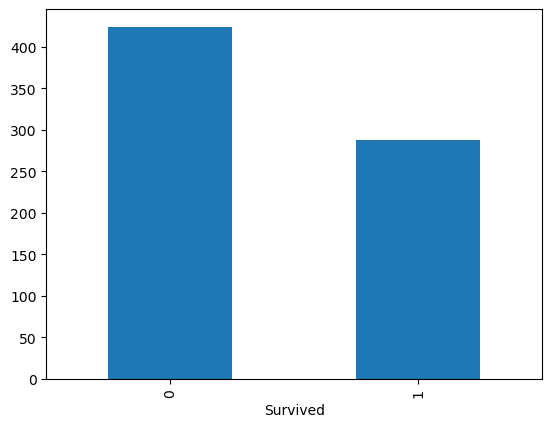

In [8]:
survived_dist = titanic["Survived"].value_counts()

survived_dist.plot(kind="bar")
plt.show

- Preparing the data before modeling

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
features = titanic.drop(columns=['PassengerId', 'Name', 'Ticket'])
features

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
features['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
features['Sex'] = features['Sex'].replace({'male':0, 'female':1})
features

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Q
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
889,1,1,0,26.0,0,0,30.0000,C


In [13]:
features['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
features = pd.get_dummies(features, columns=['Embarked'], dtype=int)
features

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,0,1,0
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


For baseline, we will train a Logistic Regression in imbalanced data.

In [15]:
features=features.drop(columns = 'Survived')
target = titanic['Survived']

print(features.shape)
print(target.shape)

(712, 9)
(712,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [18]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
logistic_reg.score(X_test_scaled, y_test)

0.8181818181818182

In [20]:
pred = logistic_reg.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.84      0.70      0.77        61

    accuracy                           0.82       143
   macro avg       0.82      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



#### Oversampling

In [22]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["Survived"] = y_train.values
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,-1.492803,-0.747599,0.117556,-0.539048,-0.503861,0.261289,-0.486782,-0.195758,0.544176,0
1,-1.492803,-0.747599,0.607589,-0.539048,0.624867,2.102763,-0.486782,-0.195758,0.544176,0
2,-0.303160,-0.747599,0.397575,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0
3,0.886482,-0.747599,0.047551,-0.539048,-0.503861,-0.500577,-0.486782,-0.195758,0.544176,0
4,0.886482,-0.747599,-0.722500,-0.539048,-0.503861,-0.502738,-0.486782,-0.195758,0.544176,0
...,...,...,...,...,...,...,...,...,...,...
564,0.886482,1.337616,0.677593,-0.539048,5.139780,-0.120911,-0.486782,5.108350,-1.837641,0
565,-0.303160,-0.747599,0.257565,-0.539048,-0.503861,-0.422259,-0.486782,-0.195758,0.544176,0
566,-0.303160,-0.747599,-0.932514,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0
567,-0.303160,-0.747599,0.677593,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0


In [23]:
train['Survived'].value_counts()

Survived
0    342
1    227
Name: count, dtype: int64

In [24]:
survived_df=train[train['Survived']==1]
no_survived_df=train[train['Survived']==0]

In [26]:
survived_df_oversampled = resample(survived_df, n_samples=len(no_survived_df), replace=True)
survived_df_oversampled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
194,-0.303160,1.337616,-1.772569,0.514967,0.624867,-0.230451,-0.486782,-0.195758,0.544176,1
539,-0.303160,1.337616,-1.562555,-0.539048,1.753596,-0.172328,-0.486782,-0.195758,0.544176,1
215,-1.492803,-0.747599,0.467579,-0.539048,-0.503861,-0.169868,-0.486782,-0.195758,0.544176,1
463,-0.303160,1.337616,0.467579,0.514967,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,1
274,0.886482,-0.747599,1.097621,-0.539048,-0.503861,-0.497819,-0.486782,-0.195758,0.544176,1
...,...,...,...,...,...,...,...,...,...,...
151,-1.492803,1.337616,-0.372476,-0.539048,-0.503861,0.845430,2.054309,-0.195758,-1.837641,1
238,0.886482,1.337616,-1.982583,-0.539048,1.753596,-0.360260,2.054309,-0.195758,-1.837641,1
141,-1.492803,1.337616,-0.722500,-0.539048,1.753596,-0.171732,-0.486782,-0.195758,0.544176,1
464,-1.492803,1.337616,-0.512486,-0.539048,-0.503861,2.068559,-0.486782,-0.195758,0.544176,1


In [27]:
no_survived_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,-1.492803,-0.747599,0.117556,-0.539048,-0.503861,0.261289,-0.486782,-0.195758,0.544176,0
1,-1.492803,-0.747599,0.607589,-0.539048,0.624867,2.102763,-0.486782,-0.195758,0.544176,0
2,-0.303160,-0.747599,0.397575,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0
3,0.886482,-0.747599,0.047551,-0.539048,-0.503861,-0.500577,-0.486782,-0.195758,0.544176,0
4,0.886482,-0.747599,-0.722500,-0.539048,-0.503861,-0.502738,-0.486782,-0.195758,0.544176,0
...,...,...,...,...,...,...,...,...,...,...
560,0.886482,-0.747599,-0.442481,-0.539048,-0.503861,-0.500577,-0.486782,-0.195758,0.544176,0
564,0.886482,1.337616,0.677593,-0.539048,5.139780,-0.120911,-0.486782,5.108350,-1.837641,0
565,-0.303160,-0.747599,0.257565,-0.539048,-0.503861,-0.422259,-0.486782,-0.195758,0.544176,0
566,-0.303160,-0.747599,-0.932514,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0


In [28]:
train_oversample = pd.concat([survived_df_oversampled, no_survived_df])
train_oversample

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
194,-0.303160,1.337616,-1.772569,0.514967,0.624867,-0.230451,-0.486782,-0.195758,0.544176,1
539,-0.303160,1.337616,-1.562555,-0.539048,1.753596,-0.172328,-0.486782,-0.195758,0.544176,1
215,-1.492803,-0.747599,0.467579,-0.539048,-0.503861,-0.169868,-0.486782,-0.195758,0.544176,1
463,-0.303160,1.337616,0.467579,0.514967,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,1
274,0.886482,-0.747599,1.097621,-0.539048,-0.503861,-0.497819,-0.486782,-0.195758,0.544176,1
...,...,...,...,...,...,...,...,...,...,...
560,0.886482,-0.747599,-0.442481,-0.539048,-0.503861,-0.500577,-0.486782,-0.195758,0.544176,0
564,0.886482,1.337616,0.677593,-0.539048,5.139780,-0.120911,-0.486782,5.108350,-1.837641,0
565,-0.303160,-0.747599,0.257565,-0.539048,-0.503861,-0.422259,-0.486782,-0.195758,0.544176,0
566,-0.303160,-0.747599,-0.932514,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0


In [29]:
train_oversample['Survived'].value_counts()

Survived
1    342
0    342
Name: count, dtype: int64

- Now, with balanced data, we will create a new instance of Logistic Regression.

In [30]:
X_train_over = train_oversample.drop(columns='Survived')
y_train_over = train_oversample['Survived']

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [34]:
log_reg.score(X_test_scaled, y_test)

/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8181818181818182

In [35]:
pred = log_reg.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        82
           1       0.82      0.74      0.78        61

    accuracy                           0.82       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Undersampling

In [36]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,-1.492803,-0.747599,0.117556,-0.539048,-0.503861,0.261289,-0.486782,-0.195758,0.544176,0
1,-1.492803,-0.747599,0.607589,-0.539048,0.624867,2.102763,-0.486782,-0.195758,0.544176,0
2,-0.303160,-0.747599,0.397575,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0
3,0.886482,-0.747599,0.047551,-0.539048,-0.503861,-0.500577,-0.486782,-0.195758,0.544176,0
4,0.886482,-0.747599,-0.722500,-0.539048,-0.503861,-0.502738,-0.486782,-0.195758,0.544176,0
...,...,...,...,...,...,...,...,...,...,...
564,0.886482,1.337616,0.677593,-0.539048,5.139780,-0.120911,-0.486782,5.108350,-1.837641,0
565,-0.303160,-0.747599,0.257565,-0.539048,-0.503861,-0.422259,-0.486782,-0.195758,0.544176,0
566,-0.303160,-0.747599,-0.932514,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0
567,-0.303160,-0.747599,0.677593,-0.539048,-0.503861,-0.176799,-0.486782,-0.195758,0.544176,0


In [38]:
no_survived_undersample = resample(no_survived_df, n_samples=len(survived_df))
no_survived_undersample

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
276,0.886482,-0.747599,-0.442481,-0.539048,-0.503861,-0.476806,-0.486782,-0.195758,0.544176,0
72,-0.303160,-0.747599,0.117556,-0.539048,-0.503861,-0.454003,-0.486782,-0.195758,0.544176,0
564,0.886482,1.337616,0.677593,-0.539048,5.139780,-0.120911,-0.486782,5.108350,-1.837641,0
134,0.886482,-0.747599,-0.652495,-0.539048,-0.503861,-0.501321,-0.486782,-0.195758,0.544176,0
400,-1.492803,-0.747599,0.747598,-0.539048,-0.503861,-0.146023,2.054309,-0.195758,-1.837641,0
...,...,...,...,...,...,...,...,...,...,...
9,0.886482,1.337616,-0.372476,-0.539048,-0.503861,-0.483512,-0.486782,-0.195758,0.544176,0
431,0.886482,1.337616,-0.582490,0.514967,-0.503861,-0.466075,-0.486782,-0.195758,0.544176,0
174,0.886482,-0.747599,-0.092458,-0.539048,-0.503861,-0.501321,-0.486782,-0.195758,0.544176,0
513,0.886482,-0.747599,-0.302472,-0.539048,-0.503861,-0.504973,-0.486782,-0.195758,0.544176,0


In [39]:
train_under=pd.concat([survived_df, no_survived_undersample])
train_under

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
8,0.886482,-0.747599,-0.162462,-0.539048,-0.503861,-0.486865,-0.486782,-0.195758,0.544176,1
10,-1.492803,1.337616,1.447644,-0.539048,0.624867,3.784918,2.054309,-0.195758,-1.837641,1
13,0.886482,-0.747599,-0.582490,-0.539048,-0.503861,-0.502366,-0.486782,-0.195758,0.544176,1
15,-1.492803,1.337616,-1.002518,-0.539048,0.624867,3.137809,-0.486782,-0.195758,0.544176,1
16,0.886482,1.337616,-0.792504,-0.539048,-0.503861,-0.507731,-0.486782,-0.195758,0.544176,1
...,...,...,...,...,...,...,...,...,...,...
9,0.886482,1.337616,-0.372476,-0.539048,-0.503861,-0.483512,-0.486782,-0.195758,0.544176,0
431,0.886482,1.337616,-0.582490,0.514967,-0.503861,-0.466075,-0.486782,-0.195758,0.544176,0
174,0.886482,-0.747599,-0.092458,-0.539048,-0.503861,-0.501321,-0.486782,-0.195758,0.544176,0
513,0.886482,-0.747599,-0.302472,-0.539048,-0.503861,-0.504973,-0.486782,-0.195758,0.544176,0


In [40]:
X_train_under = train_under.drop(columns="Survived")
y_train_under = train_under["Survived"]

In [41]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [42]:
pred = log_reg.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.83      0.79      0.81        61

    accuracy                           0.84       143
   macro avg       0.84      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143



/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
smote=SMOTE(sampling_strategy=1.0)

In [ ]:
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
log_reg=LogisticRegression()

log_reg.fit(X_train_sm, y_train_sm)

pred = log_reg.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=pred))